# Color Bubbles

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba_array
from mycolorpy import colorlist as mcp
from string import capwords

``https://matplotlib.org/stable/users/explain/colors/colormaps.html#``

In [2]:
rng = np.random.default_rng()

## Palette Generator

['#440154', '#21918c', '#fde725']
['#440154', '#3b528b', '#21918c', '#5ec962', '#fde725']
['#440154', '#443983', '#31688e', '#21918c', '#35b779', '#90d743', '#fde725']
['#440154', '#472d7b', '#3b528b', '#2c728e', '#21918c', '#28ae80', '#5ec962', '#addc30', '#fde725']
['#440154', '#482475', '#414487', '#355f8d', '#2a788e', '#21918c', '#22a884', '#44bf70', '#7ad151', '#bddf26', '#fde725']
['#440154', '#481f70', '#443983', '#3b528b', '#31688e', '#287c8e', '#21918c', '#20a486', '#35b779', '#5ec962', '#90d743', '#c8e020', '#fde725']
['#440154', '#481b6d', '#46327e', '#3f4788', '#365c8d', '#2e6e8e', '#277f8e', '#21918c', '#1fa187', '#2db27d', '#4ac16d', '#73d056', '#a0da39', '#d0e11c', '#fde725']
['#440154', '#48186a', '#472d7b', '#424086', '#3b528b', '#33638d', '#2c728e', '#26828e', '#21918c', '#1fa088', '#28ae80', '#3fbc73', '#5ec962', '#84d44b', '#addc30', '#d8e219', '#fde725']


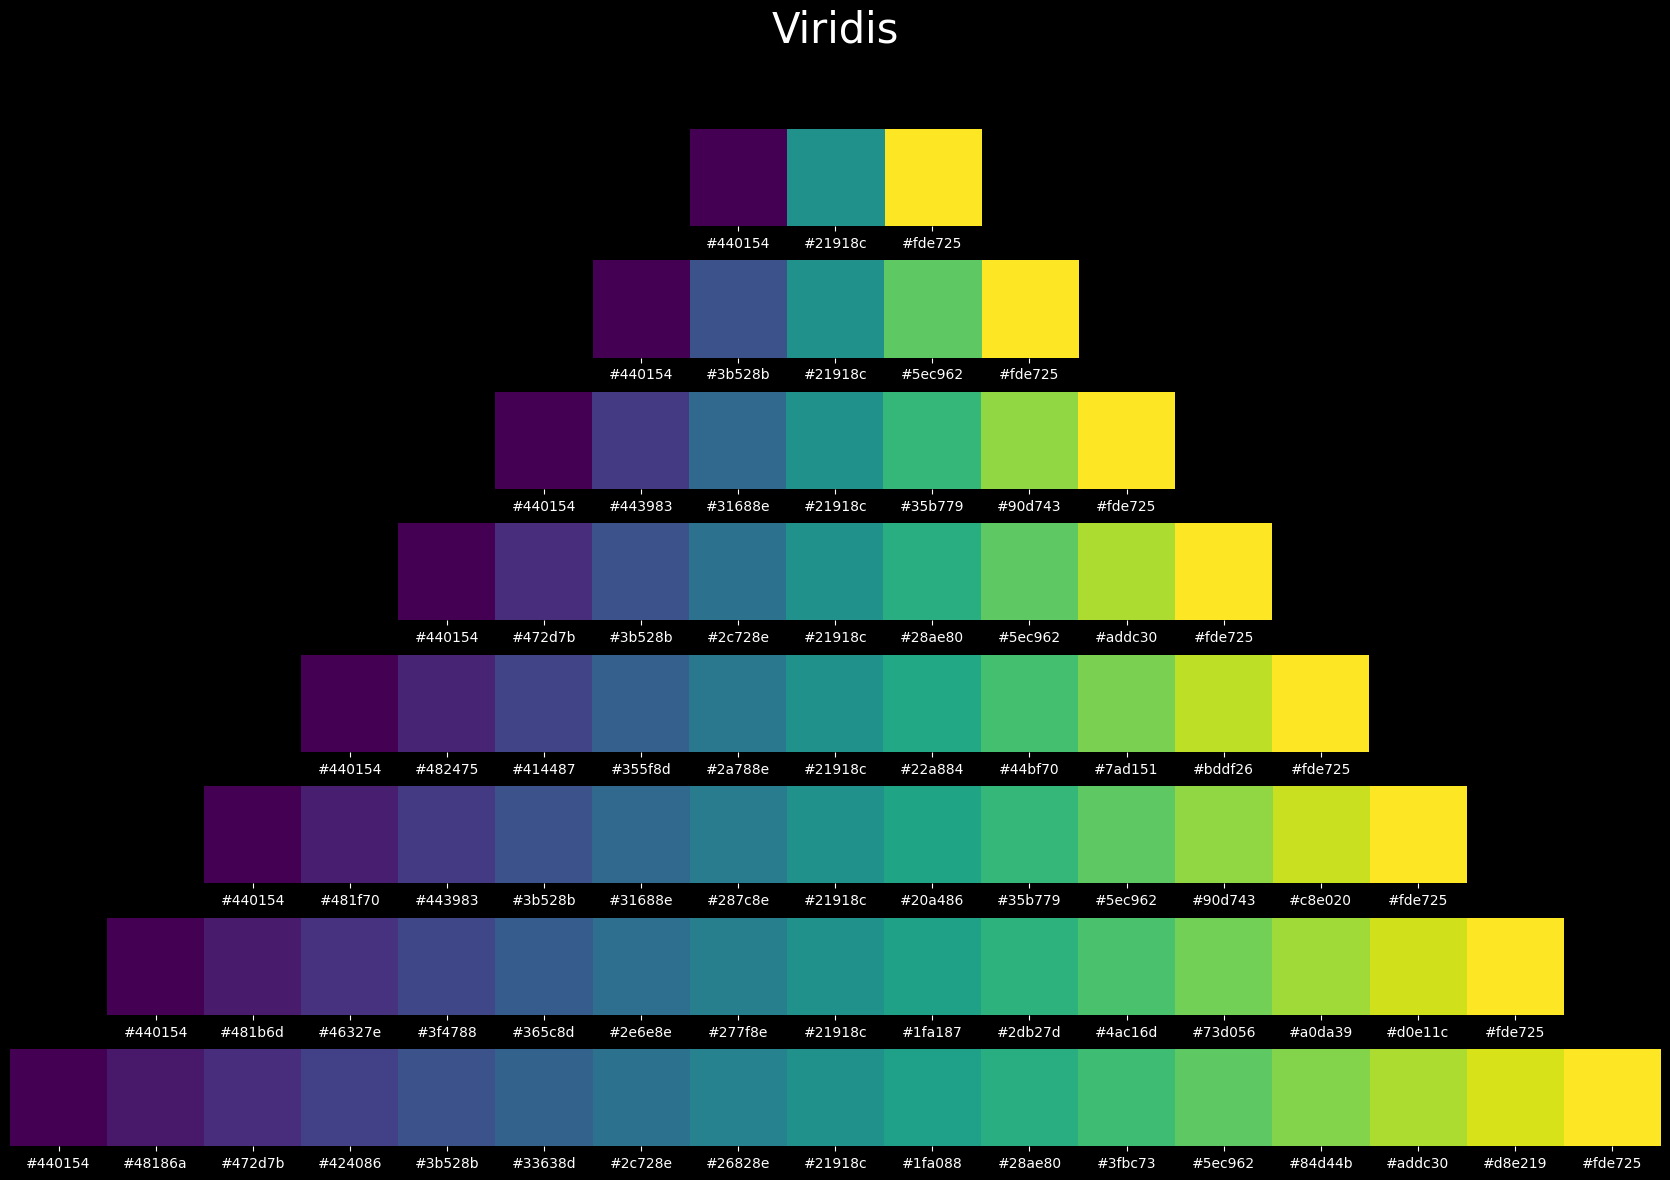

In [7]:
color_map = 'viridis' 
num_colors = range(3,18,2)
num_palettes = len(num_colors)

plt.style.use('dark_background') 
fig, axes = plt.subplots(num_palettes, 1, 
                         figsize=(num_colors[-1]*1.5,num_palettes*1.5))
for plot_num, num_color in enumerate(num_colors):
    color_list = mcp.gen_color(cmap=color_map, n=num_color)
    axes[plot_num].imshow(to_rgba_array(color_list).reshape(1,num_color,4))
    axes[plot_num].spines[:].set_visible(False)
    axes[plot_num].set_xticks(range(num_color))
    axes[plot_num].set_xticklabels(color_list)
    axes[plot_num].set_yticks([])
    print(color_list)
fig.tight_layout()
fig.suptitle(capwords(color_map.replace('_',' ')), fontsize = 30)
fig.subplots_adjust(top=0.88)
plt.show()

## Palette Menu

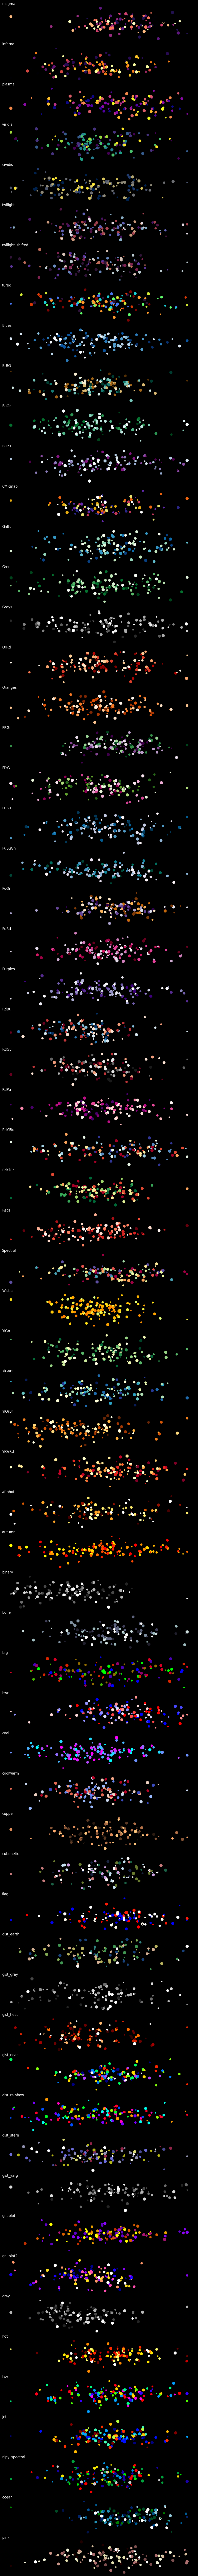

In [5]:
num_maps = 64#len(plt.colormaps()) # 164 max
num_bubbles = 128
num_colors = 8
num_sizes = 6
size_step = 16
plot_width = 12
plot_height = 2.5

plt.style.use('dark_background') 
fig, axes = plt.subplots(num_maps, 1, figsize=(plot_width, num_maps*plot_height))

for i, color_scale in enumerate(plt.colormaps()[:num_maps]):

    # Data
    x = np.random.normal(0, 3, num_bubbles).round(3)                                # +/-3 std from 0rigin
    y = np.random.normal(0, 3, num_bubbles).round(3)                                # +/-3 std from 0rigin
    sizes = (rng.integers(num_sizes, size=num_bubbles).astype('int') + 1)*size_step # size_step to size_step*num_sizes
    colors = rng.integers(num_colors, size=num_bubbles).astype('int')               # 0 to num_bubbles

    # Frame
    df = pd.DataFrame([x, y, sizes, colors]).T
    df.columns = ['Distance', 'Height', 'Size', 'Color']

    # Color
    scale_colors = dict(zip(range(num_colors), 
                            mcp.gen_color(cmap=color_scale, n=num_colors)))
    df['Color'] = df['Color'].map(scale_colors)

    # Plot
    axes[i].scatter(df.iloc[:,0], df.iloc[:,1], df.iloc[:,2], df.iloc[:,3])
    axes[i].spines[:].set_visible(False)
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_title(color_scale, loc='left')

#plt.savefig("colormaps.jpg",bbox_inches='tight')

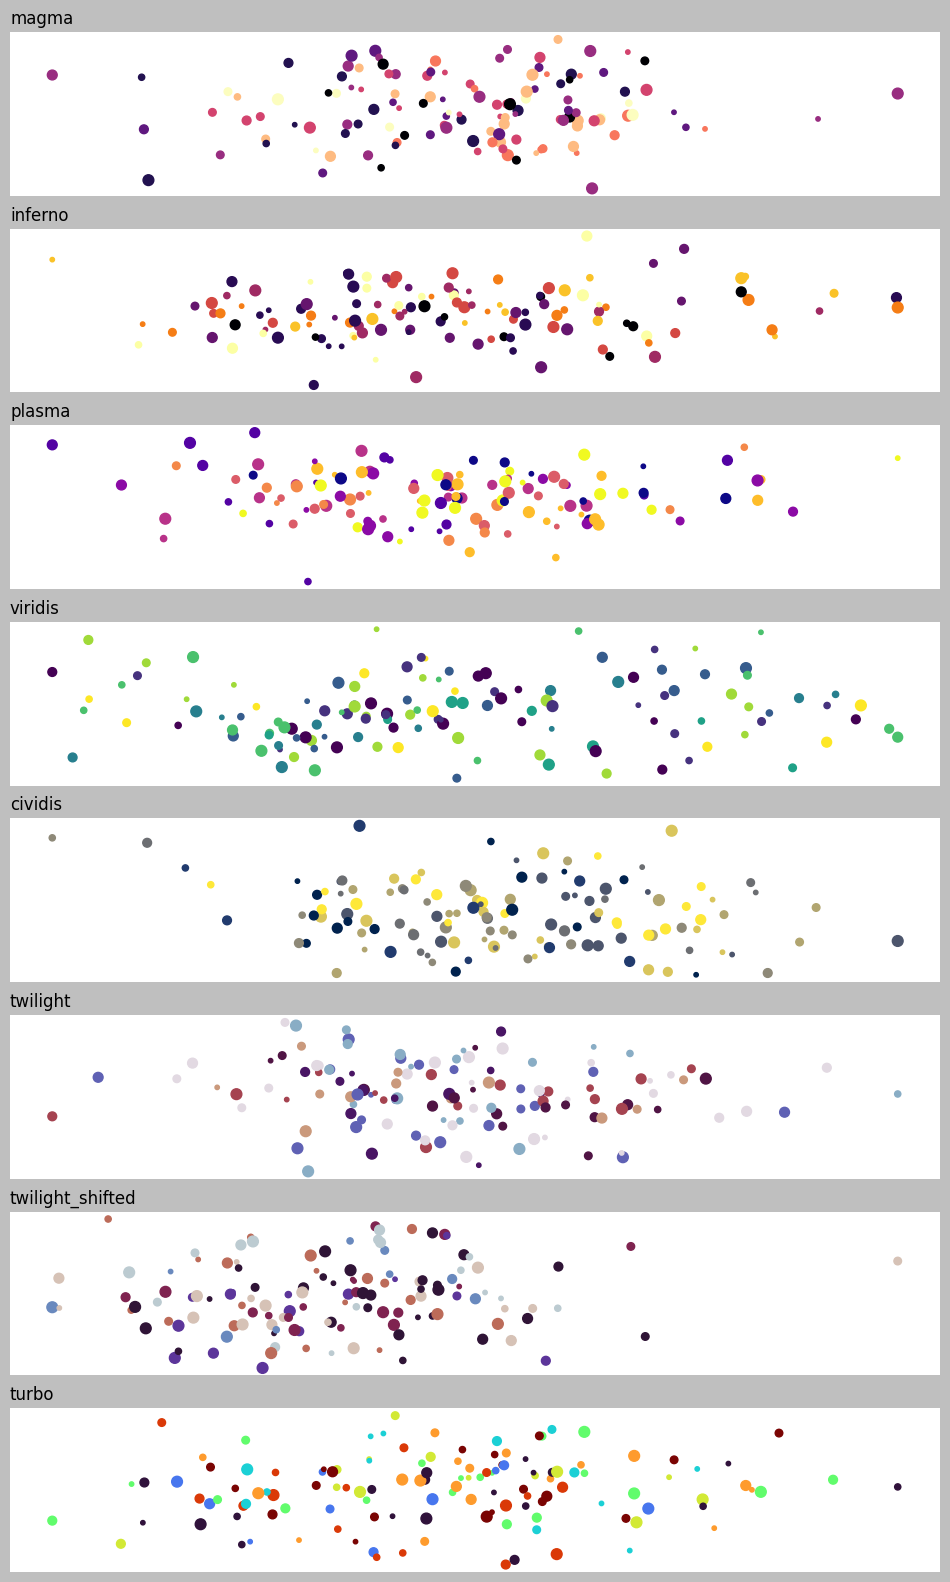

In [5]:
plt.style.use('grayscale') # plt.style.available:  dark_background [black], 
# Solarize_Light2 [tan], ggplot [grey panel], grayscale [grey border], fivethirtyeight [grey]
fig, axes = plt.subplots(8, 1, figsize=(12, 20))
for i, color_scale in enumerate(plt.colormaps()[:8]):
    x = np.random.normal(0, 3, 128).round(3)                                # +/-3 std from 0rigin
    y = np.random.normal(0, 3, 128).round(3)                                # +/-3 std from 0rigin
    sizes = (rng.integers(6, size=128).astype('int') + 1)*10       # size_step to size_step*num_sizes
    colors = rng.integers(8, size=128).astype('int')               # 0 to num_bubbles
    df = pd.DataFrame([x, y, sizes, colors]).T
    df.columns = ['Distance', 'Height', 'Size', 'Color']
    scale_colors = dict(zip(range(8), mcp.gen_color(cmap=color_scale, n=8)))
    df['Color'] = df['Color'].map(scale_colors)
    axes[i].scatter(df.iloc[:,0], df.iloc[:,1], df.iloc[:,2], df.iloc[:,3])
    axes[i].spines[:].set_visible(False)
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_title(color_scale, loc='left')